In [1]:
import tensorflow as tf
from tensorflow import keras

C:\Anaconda3\envs\minor_dl_env\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Convolutional neural network

In [2]:
import cv2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

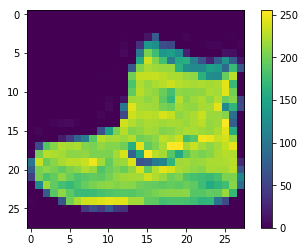

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

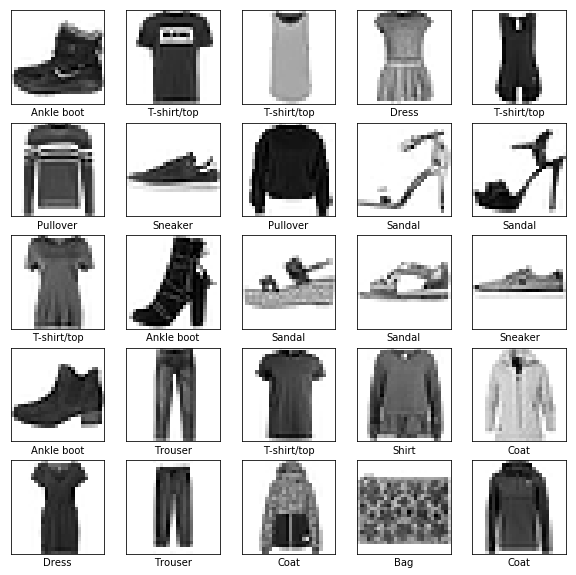

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [21]:
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

In [22]:
train_images.shape

(60000, 28, 28, 1)

In [31]:
#from keras.utils import to_categorical
#one-hot encode target column
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [23]:
model = keras.Sequential()
#add model layers
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 1234s 21ms/step - loss: 0.3921 - acc: 0.8611 - val_loss: 0.3151 - val_acc: 0.8875
Epoch 2/3
60000/60000 [==============================] - 1209s 20ms/step - loss: 0.2592 - acc: 0.9069 - val_loss: 0.3044 - val_acc: 0.8915
Epoch 3/3
60000/60000 [==============================] - 1143s 19ms/step - loss: 0.2088 - acc: 0.9244 - val_loss: 0.2690 - val_acc: 0.9042


In [33]:
model.predict(test_images[:4])

array([[9.5005896e-07, 2.1160200e-09, 2.8329971e-08, 1.4899602e-08,
        3.3348235e-07, 2.7314888e-04, 1.8421150e-06, 5.7568494e-04,
        6.4734877e-06, 9.9914145e-01],
       [1.9216967e-04, 8.5334351e-10, 9.9949837e-01, 5.9057598e-08,
        2.7566729e-04, 6.8482699e-11, 3.3672946e-05, 4.1291272e-11,
        4.1339066e-09, 9.5633035e-10],
       [5.3108954e-05, 9.9989069e-01, 7.4187692e-06, 2.3879025e-05,
        6.3149660e-06, 2.7203337e-06, 1.3114110e-05, 6.2419005e-08,
        2.5905051e-06, 1.9403634e-08],
       [4.5353527e-06, 9.9978465e-01, 2.4500702e-07, 1.1216079e-04,
        6.1861851e-05, 1.5378254e-06, 3.4614855e-05, 1.4337944e-07,
        1.4339174e-07, 1.8596182e-07]], dtype=float32)

In [44]:
np.argmax(test_labels[1])

2

In [35]:
predictions = model.predict(test_images)

In [55]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], np.argmax(true_label[i]), img[i].reshape(28,28)
    plt.grid(False)
    plt.xticks([]) 
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], np.argmax(true_label[i])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

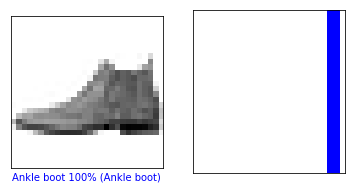

In [56]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

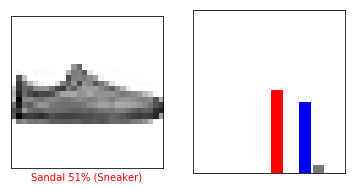

In [57]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

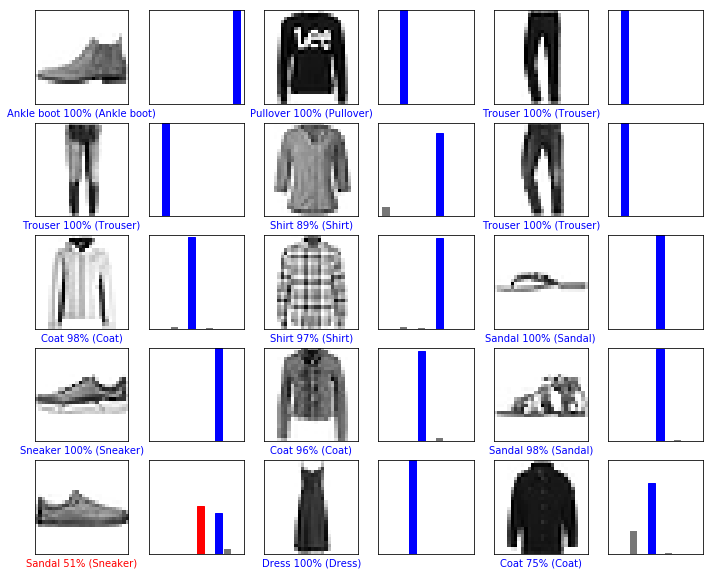

In [58]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

# CIFAR-10

# OpenCV

In [3]:
image = cv2.imread("turtle.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray = cv2.GaussianBlur(gray, (3, 3), 0)
cv2.imwrite("gray.png", gray)

True

In [3]:
image = cv2.imread('dog.jpg')

Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392

# чтение названия классов из файла
classes = None
with open('yolov3.txt', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# разные цвета для разных классов 
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

# загружаем натренированную модель и файл с конфигурацией
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

# create input blob with size 416x416
blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

# передаем блоб в сеть
net.setInput(blob)

In [4]:
def get_output_layers(net):
    
    layer_names = net.getLayerNames()
    
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers

In [5]:
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])

    color = COLORS[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [6]:
outs = net.forward(get_output_layers(net))

# initialization
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

# for each detetion from each output layer 
# get the confidence, class id, bounding box params
# and ignore weak detections (confidence < 0.5)
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

In [7]:
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

# go through the detections remaining
# after nms and draw bounding box
for i in indices:
    i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    
    draw_bounding_box(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

# display output image    
cv2.imshow("object detection", image)

cv2.waitKey()
    
 # save output image to disk
cv2.imwrite("object-detection.jpg", image)

# release resources
cv2.destroyAllWindows()

# CIFAR-10

In [20]:
batch_size = 32
num_classes = 10
epochs = 10
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
cifar10 = keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 185s 1us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

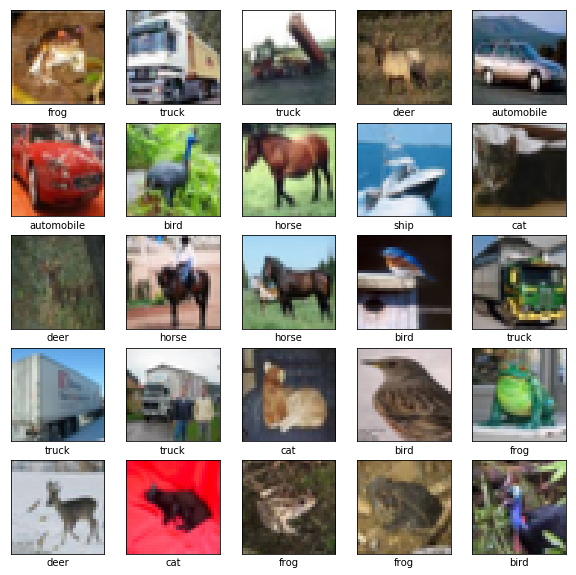

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(classes[np.argmax(y_train[i])])

In [24]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(32, (3, 3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64, (3, 3), padding='same'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Conv2D(64, (3, 3)))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_classes))
model.add(keras.layers.Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [26]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 2502s 50ms/step - loss: 1.8226 - acc: 0.3334 - val_loss: 1.5457 - val_acc: 0.4380
Epoch 2/10
50000/50000 [==============================] - 2220s 44ms/step - loss: 1.4863 - acc: 0.4592 - val_loss: 1.3295 - val_acc: 0.5228
Epoch 3/10
50000/50000 [==============================] - 2492s 50ms/step - loss: 1.3454 - acc: 0.5180 - val_loss: 1.2396 - val_acc: 0.5572
Epoch 4/10
50000/50000 [==============================] - 2558s 51ms/step - loss: 1.2522 - acc: 0.5548 - val_loss: 1.1808 - val_acc: 0.5846
Epoch 5/10
50000/50000 [==============================] - 2401s 48ms/step - loss: 1.1779 - acc: 0.5826 - val_loss: 1.1602 - val_acc: 0.5862
Epoch 6/10
50000/50000 [==============================] - 2130s 43ms/step - loss: 1.1071 - acc: 0.6095 - val_loss: 1.0274 - val_acc: 0.6421
Epoch 7/10
50000/50000 [==============================] - 2050s 41ms/step - loss: 1.0590 - acc: 0.6266 - val_l

In [29]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], np.argmax(true_label[i]), img[i]
    plt.grid(False)
    plt.xticks([]) 
    plt.yticks([])
    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)

In [28]:
predictions = model.predict(x_test)

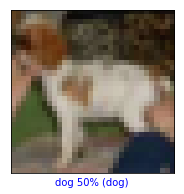

In [30]:
i = 12
plt.figure(figsize=(6,3))
plot_image(i, predictions, y_test, x_test)
plt.show()

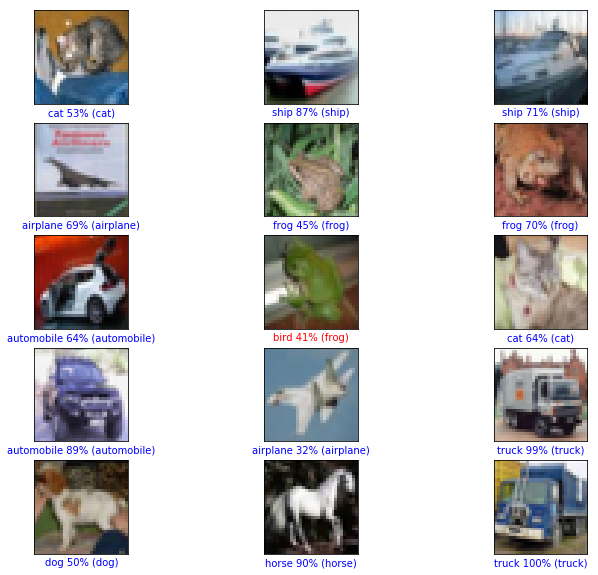

In [33]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, x_test)
plt.show()